In [109]:
import numpy as np
from numpy import loadtxt
from statistics import stdev
import matplotlib.pyplot as plt
import pprint
import pandas as pd
from pprint import pprint
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [111]:
BigX=loadtxt("training_3a.txt")
BigX1b=BigX
# for i in range(2,14):
#     next=loadtxt("stripper_data_"+str(i)+"b.txt")
#     BigX=np.concatenate((BigX,next),axis=0)

#BigX1b=np.concatenate((BigX1b,BigX2b),axis=0)
#print(BigX)
#print(type(BigX))
dim=len(BigX[0]) #number of cols
num_examples_train=len(BigX)
print(dim,num_examples_train)

# dim2b=len(BigX2b[0]) #number of cols
# num_examples_train2b=len(BigX2b)
# print(dim2b,num_examples_train2b)
# TestX=loadtxt("process_data_testing.txt")
# num_examples_test=len(TestX)
#print(dim,num_examples_test)
BigX_org=BigX

76 347


In [112]:
# def normaliser(genericData):
#     #normalising
#     min_indices=np.amin(genericData,axis=0)
#     #print(min_indices)
#     max_indices=np.amax(genericData,axis=0)
#     #print(max_indices)
#     diff_train=max_indices-min_indices
#     #print(diff_train)
#     check=(genericData-min_indices)/diff_train
#     #print(check)
#     data_normalised= tf.cast(check, tf.float32)
#     #print(train_data_normalised)
#     #print(type(train_data_normalised))
#     return data_normalised

'''
I will try to scale in a robust fashion since data may contain plenty of anomalies
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
'''
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [113]:
# transformerRS = RobustScaler().fit(BigX)
# transformerRS.transform(BigX)
scaling = RobustScaler()
BigX=scaling.fit_transform(BigX)
#RobustScaler(quantile_range=(25, 75)).fit_transform(BigX)
pprint(BigX)
pprint(BigX_org)
if(np.array_equal(BigX_org, BigX)):
    print("robust scaler not useful")

array([[ 1.41681947, -1.51352159,  0.        , ..., -1.07578524,
        -1.09589818, -1.04095199],
       [ 1.45665696, -1.37935156,  0.        , ..., -1.10510614,
        -1.04759503, -1.03591702],
       [ 1.44421673, -1.46630808,  0.        , ..., -1.09780348,
        -1.04556944, -0.98826052],
       ...,
       [-0.25728976,  0.93799492,  0.        , ...,  0.93926961,
         0.90627029,  0.93164124],
       [-0.29906878,  0.92663977,  0.        , ...,  0.92455403,
         0.91441467,  0.936685  ],
       [-0.27411642,  0.90153892,  0.        , ...,  0.93919751,
         0.95568709,  0.93686514]])
array([[1.1028586e+01, 8.3787500e-01, 1.2360000e-02, ..., 1.9439188e+01,
        1.9453783e+01, 2.0169388e+01],
       [1.1029140e+01, 8.3832400e-01, 1.2360000e-02, ..., 1.9432274e+01,
        1.9465277e+01, 2.0170534e+01],
       [1.1028967e+01, 8.3803300e-01, 1.2360000e-02, ..., 1.9433996e+01,
        1.9465759e+01, 2.0181381e+01],
       ...,
       [1.1005305e+01, 8.4607900e-01, 1

In [141]:
# print(train_data_normalised)
#setting up parameters for autoencoder
nb_epoch = 500
batch_size = 128
input_dim = dim #num of columns,6
#encoding_dim = 60
hidden_dim_1 = 65
hidden_dim_2= 55
bottleneck = 50
learning_rate = 1e-7

In [142]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

In [143]:
# #Encoder
# encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
# #encoder=tf.keras.layers.Dropout(0.2)(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

#encoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
encoder=tf.keras.layers.Dense(hidden_dim_1,activation="relu")(input_layer)
encoder=tf.keras.layers.Dense(hidden_dim_2,activation="relu")(encoder)
encoder= tf.keras.layers.Dense(bottleneck,activation="relu")(encoder)
# # encoder=  tf.keras.layers.Dropout(0.2)(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# encoder = tf.keras.layers.Dense(hidden_dim_2, activation="relu")(encoder)

In [144]:
# # Decoder
# # decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# # decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(encoder)
# decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

# decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
# #decoder=tf.keras.layers.Dropout(0.2)(decoder)
# decoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(decoder)
# decoder = tf.keras.layers.Dense(input_dim, activation="relu")(decoder)
decoder=tf.keras.layers.Dense(hidden_dim_2,activation="relu")(encoder)
decoder=tf.keras.layers.Dense(hidden_dim_1,activation="relu")(decoder)
#decoder=tf.keras.layers.Dense(encoding_dim,activation="relu")(decoder)
decoder=tf.keras.layers.Dense(input_dim,activation="relu")(decoder)
# justcheck=tf.keras.layers.Dense(6,activation="relu")(input_layer)

In [145]:
#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 76)]              0         
_________________________________________________________________
dense_72 (Dense)             (None, 65)                5005      
_________________________________________________________________
dense_73 (Dense)             (None, 55)                3630      
_________________________________________________________________
dense_74 (Dense)             (None, 50)                2800      
_________________________________________________________________
dense_75 (Dense)             (None, 55)                2805      
_________________________________________________________________
dense_76 (Dense)             (None, 65)                3640      
_________________________________________________________________
dense_77 (Dense)             (None, 76)                501

In [146]:
# # callbacks for checkpoints and early stopping
# cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
#                                mode='min', monitor='val_loss', verbose=2, save_best_only=True)
# # define our early stopping
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.0001,
#     patience=10,
#     verbose=1, 
#     mode='min',
#     restore_best_weights=True
#     )

In [147]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [148]:
history = autoencoder.fit(BigX, BigX,
                    epochs=nb_epoch,
                    shuffle=True,
                    ).history

Epoch 1/500
11/11 [==============================] - 0s 697us/step - loss: 0.4334 - accuracy: 0.0097
Epoch 2/500
11/11 [==============================] - 0s 698us/step - loss: 0.3373 - accuracy: 0.1037
Epoch 3/500
11/11 [==============================] - 0s 598us/step - loss: 0.3452 - accuracy: 0.1613
Epoch 4/500
11/11 [==============================] - 0s 598us/step - loss: 0.3105 - accuracy: 0.2502
Epoch 5/500
11/11 [==============================] - 0s 598us/step - loss: 0.3049 - accuracy: 0.2278
Epoch 6/500
11/11 [==============================] - 0s 698us/step - loss: 0.2979 - accuracy: 0.2975
Epoch 7/500
11/11 [==============================] - 0s 598us/step - loss: 0.2856 - accuracy: 0.2941
Epoch 8/500
11/11 [==============================] - 0s 598us/step - loss: 0.2890 - accuracy: 0.3534
Epoch 9/500
11/11 [==============================] - 0s 598us/step - loss: 0.2699 - accuracy: 0.3474
Epoch 10/500
11/11 [==============================] - 0s 598us/step - loss: 0.2873 - accura

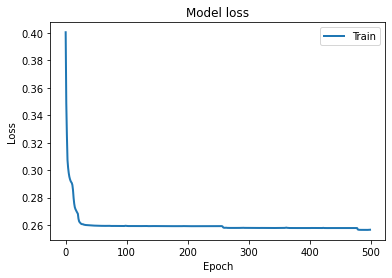

In [149]:
plt.plot(history['loss'], linewidth=2, label='Train')
#plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [150]:
train_x_predictions = autoencoder.predict(BigX)
#print(test_data_normalised,test_x_predictions)
#print(TestX)
mse = np.mean(np.power(BigX - train_x_predictions, 2), axis=1)
#print(mse)
#print(type(mse))

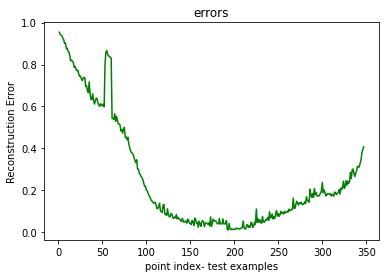

In [151]:
# data to be plotted
x = np.arange(1,len(BigX)+1)
#print(x)
#print(num_examples_test)

# plotting
plt.title("errors")
plt.xlabel("point index- test examples")
plt.ylabel("Reconstruction Error")
plt.plot(x, mse, color ="green")
plt.show()

In [152]:
# train_x_predictions = autoencoder.predict(BigX)
# #print(test_data_normalised,test_x_predictions)
# #print(BigX)
# mse_train = np.mean(np.power(BigX - train_x_predictions, 2), axis=1)

In [153]:
# x_train = np.arange(1, num_examples_train+1)
# #print(x)
# #print(num_examples_train)
 
# # plotting
# plt.title("errors")
# plt.xlabel("point index test examples")
# plt.ylabel("Reconstruction Error")
# plt.plot(x_train, mse_train, color ="green")
# plt.show()

In [154]:
TestX=loadtxt('testing_7a.txt')

In [155]:
TestX=scaling.transform(TestX)

In [156]:
test_x_predictions = autoencoder.predict(TestX)

#print(test_data_normalised,test_x_predictions)
#print(TestX)
mse2 = np.mean(np.power(TestX - test_x_predictions, 2), axis=1)

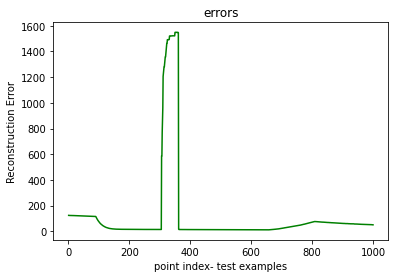

In [157]:
# data to be plotted
x2 = np.arange(1,len(TestX)+1)
#print(x)
#print(num_examples_test)

# plotting
plt.title("errors")
plt.xlabel("point index- test examples")
plt.ylabel("Reconstruction Error")
plt.plot(x2, mse2, color ="green")
plt.show()